In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"Stress Detection.csv")

In [5]:
df.head()

,subreddit,post_id,sentence_range,text,label,syntax_fk_grade,Stress Level
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,7.910952,-0.204167


In [6]:
df.shape

(2838, 7)

In [7]:
df.isna().sum()

subreddit          0
post_id            0
sentence_range     0
text               0
label              0
syntax_fk_grade    0
Stress Level       0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

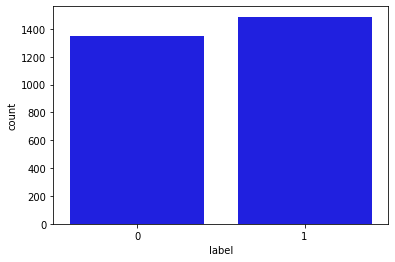

In [8]:
sns.countplot(x="label",data=df,color="blue")

c:\users\megha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

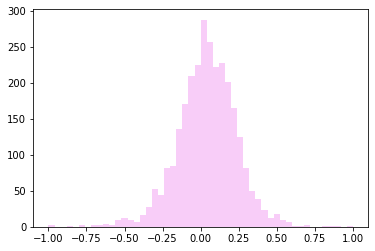

In [9]:
sns.distplot(x=df["Stress Level"],color="violet",kde=False)

<AxesSubplot:xlabel='Stress Level', ylabel='Density'>

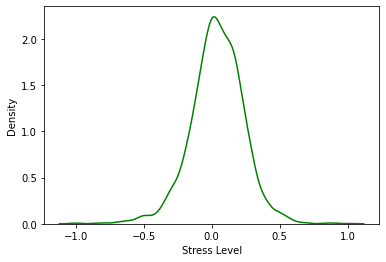

In [10]:
sns.kdeplot(df["Stress Level"],color="green")

c:\users\megha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

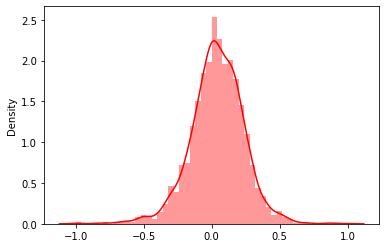

In [11]:
sns.distplot(x=df["Stress Level"],color="red")

In [12]:
df_new=df.drop(["subreddit","post_id","sentence_range","syntax_fk_grade"],axis=1)
df_new.head()

,text,label,Stress Level
0,"He said he had not felt that way before, sugge...",1,-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857
2,My mom then hit me with the newspaper and it s...,1,0.011894
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671
4,October is Domestic Violence Awareness Month a...,1,-0.204167


In [13]:
df_new.columns=["Text","Sentiment","Stress Level"]

In [14]:
import string
import nltk
import re

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
sw=nltk.corpus.stopwords.words("english")
sw[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Creating Bag Of Words Using TF-IDF Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words=sw,max_features=20)
x=tfidf.fit_transform(df_new["Text"])

In [18]:
x

<2838x20 sparse matrix of type '<class 'numpy.float64'>'
	with 9627 stored elements in Compressed Sparse Row format>

In [19]:
x_new=x.toarray()
x_new

array([[0.        , 0.        , 0.51567829, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.36168775,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26588058,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
y=df_new["Stress Level"].to_numpy()
y

array([-0.0027417 ,  0.29285714,  0.01189394, ...,  0.04545454,
        0.15972222,  0.01666667])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.metrics import accuracy_score

Applying Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(max_leaf_nodes=2000)
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=2000)

In [51]:
y_preds_dt=model_dt.predict(x_test)

In [52]:
acc_dt=model_dt.score(x_test,y_test)
abs(acc_dt)

0.8484641592064923

Applying K Nearest Neighbors Regressor

In [81]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor(n_neighbors=2)
model_knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [82]:
y_preds_knn=model_knn.predict(x_test)

In [83]:
acc_knn=model_knn.score(x_test,y_test)
abs(acc_knn)

0.49735988387921903